In [13]:
import pandas as pd

# Load the dataset
Modified_data = pd.read_csv('Modified_data.csv')

# Count the number of observations with "Monthly rent" above 50,000
num_outliers_rent = Modified_data[Modified_data["Monthly rent"] > 50000].shape[0]

# Count the number of observations with "Aconto" above 20,000
num_outliers_aconto = Modified_data[Modified_data["Aconto"] > 20000].shape[0]

# Count the number of observations with "Floor" above 40
num_outliers_floor = Modified_data[Modified_data["Floor"] > 40].shape[0]

# Count the number of observations with "Square meters" above 341
num_outliers_sqm = Modified_data[Modified_data["Square meters"] > 341].shape[0]

# Filter out the outliers
Data_wo_outliers = Modified_data[
    (Modified_data["Monthly rent"] <= 50000) &
    (Modified_data["Aconto"] <= 20000) &
    (Modified_data["Floor"] <= 40) &
    (Modified_data["Square meters"] <= 341)
]

# Save the filtered data to a new CSV file
Data_wo_outliers.to_csv("Data_wo_outliers.csv", index=False)

print(f"Number of observations removed due to 'Monthly rent' > 50000: {num_outliers_rent}")
print(f"Number of observations removed due to 'Aconto' > 20000: {num_outliers_aconto}")
print(f"Number of observations removed due to 'Floor' > 40: {num_outliers_floor}")
print(f"Number of observations removed due to 'Square meters' > 341: {num_outliers_sqm}")


Number of observations removed due to 'Monthly rent' > 50000: 105
Number of observations removed due to 'Aconto' > 20000: 26
Number of observations removed due to 'Floor' > 40: 3
Number of observations removed due to 'Square meters' > 341: 22


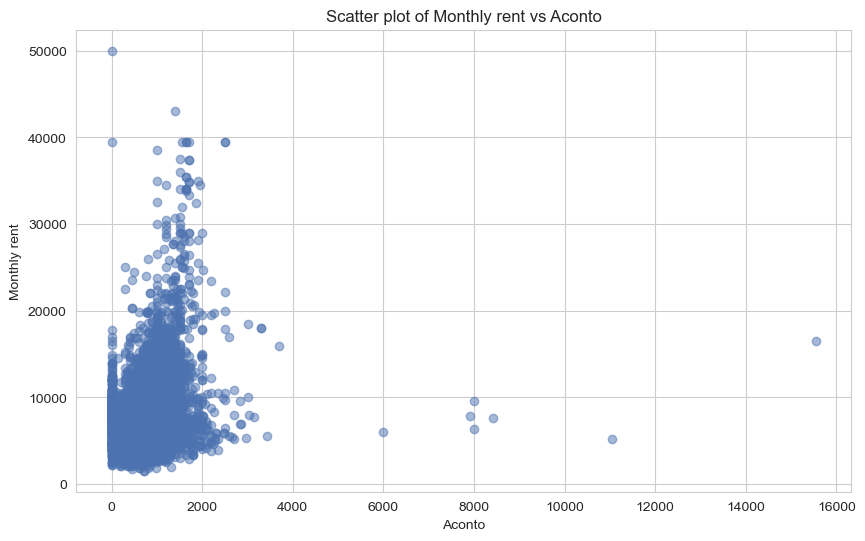

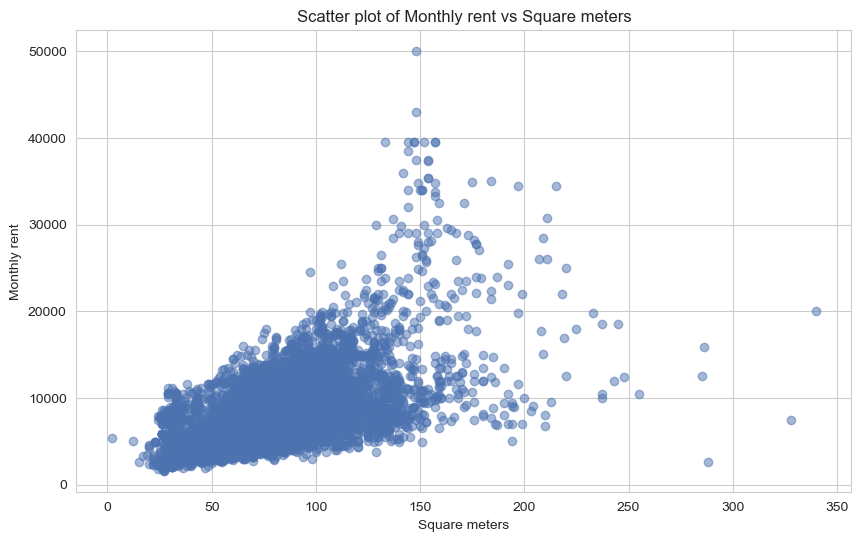

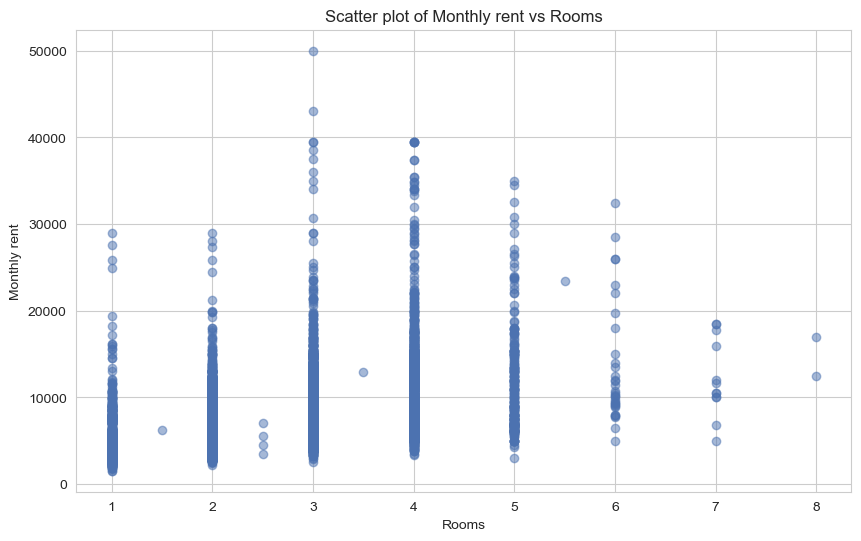

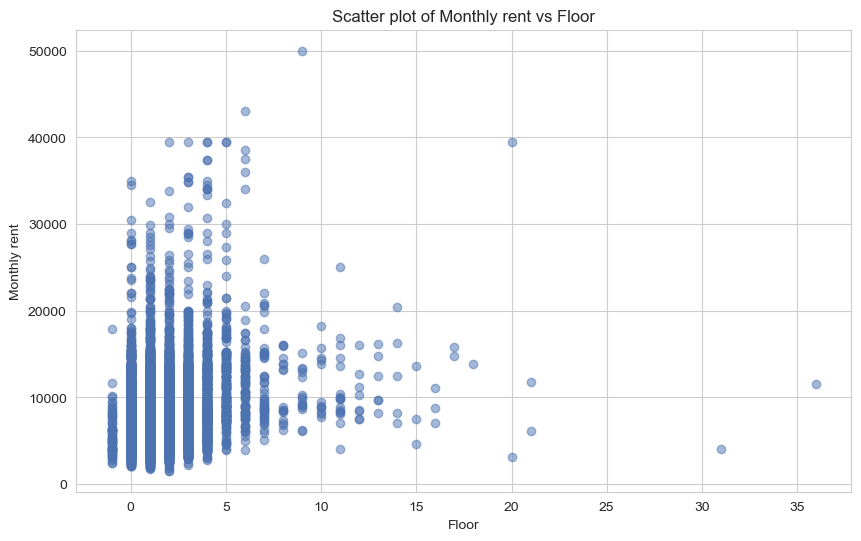

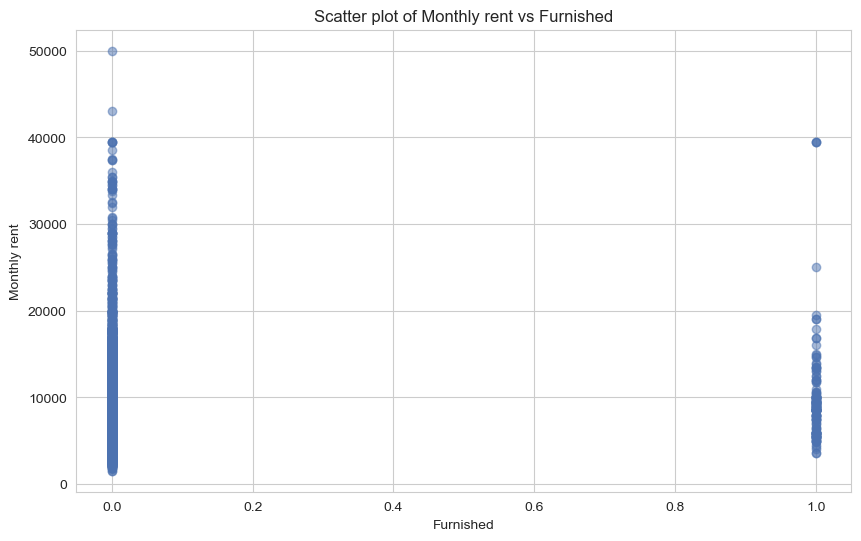

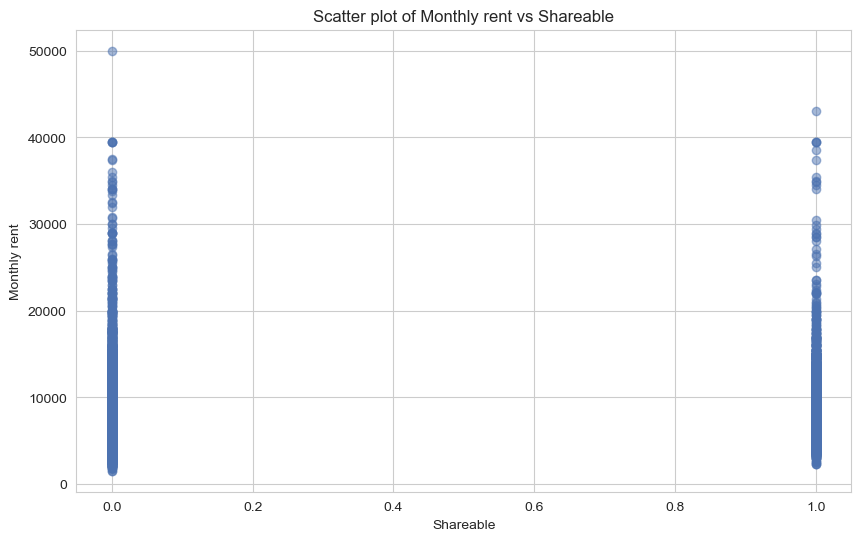

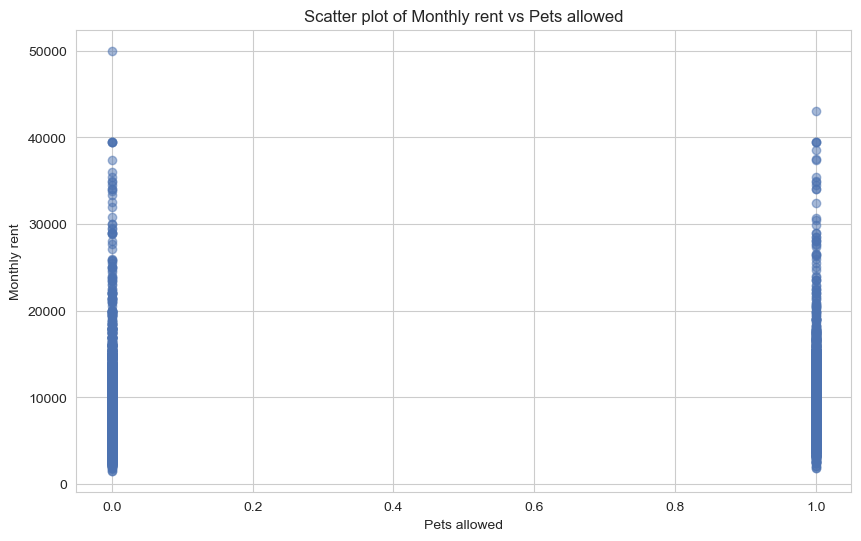

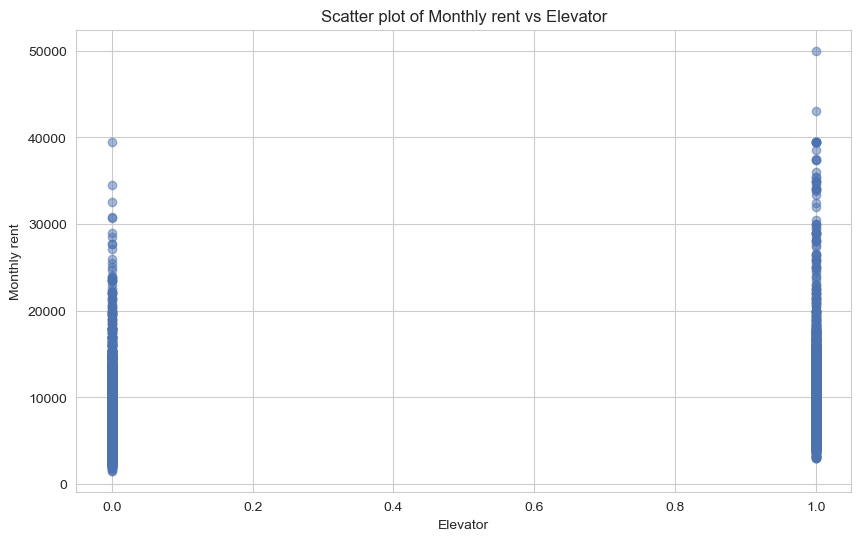

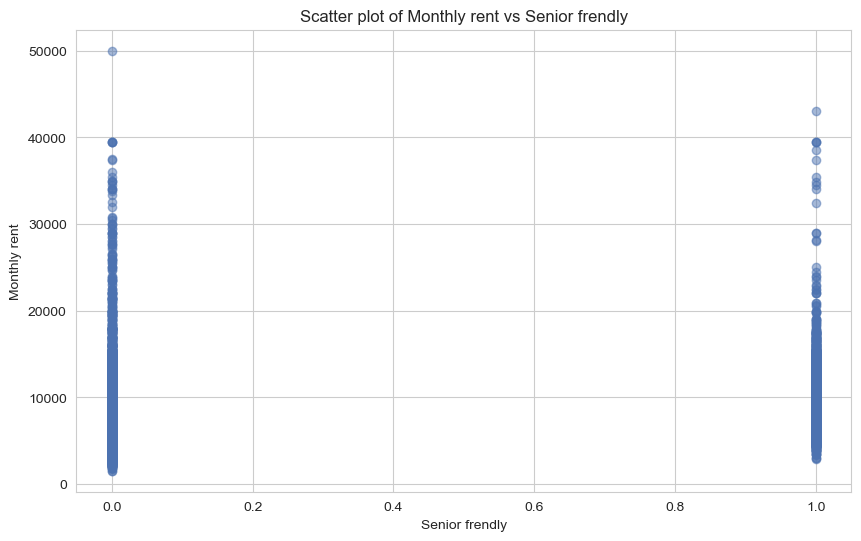

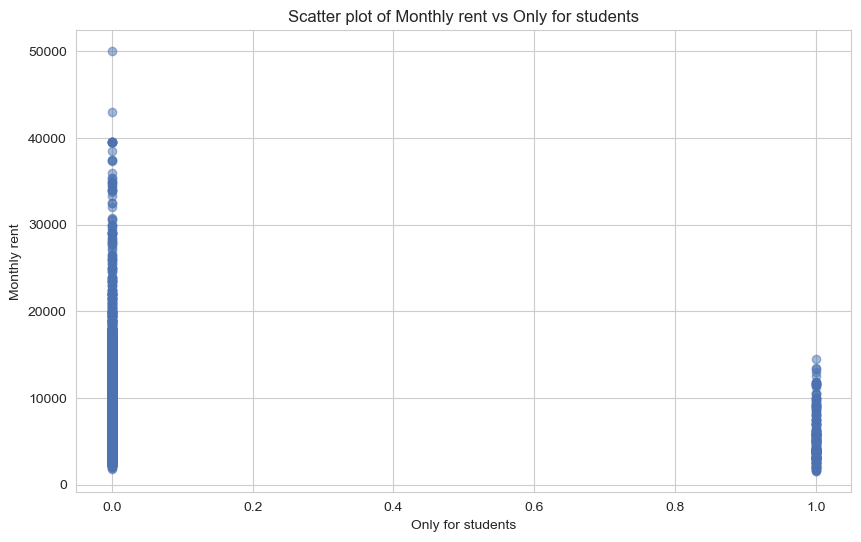

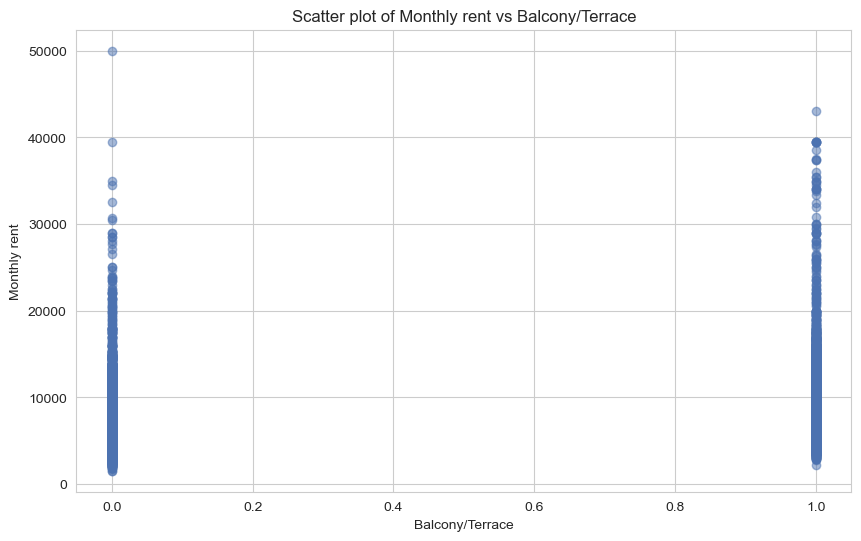

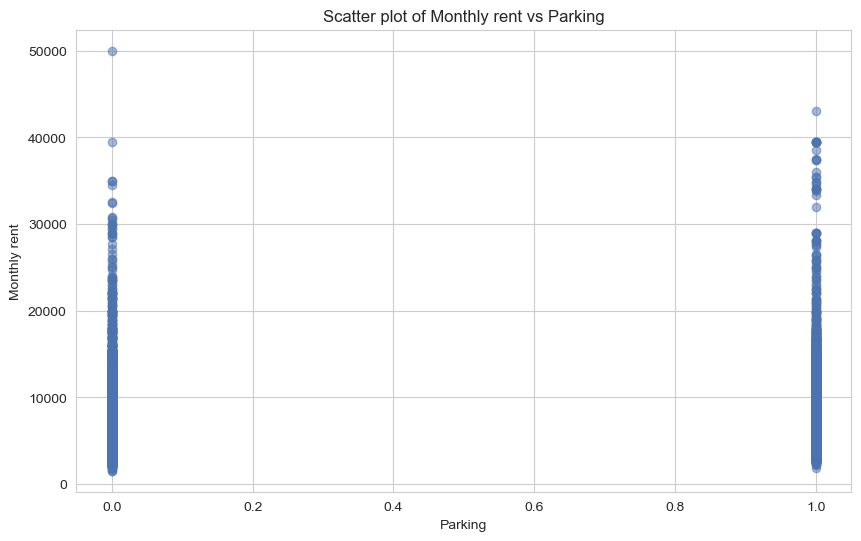

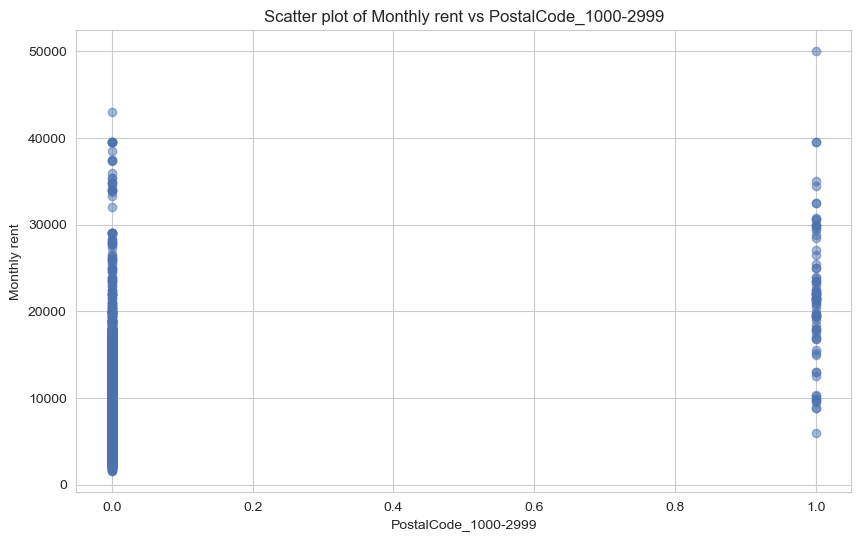

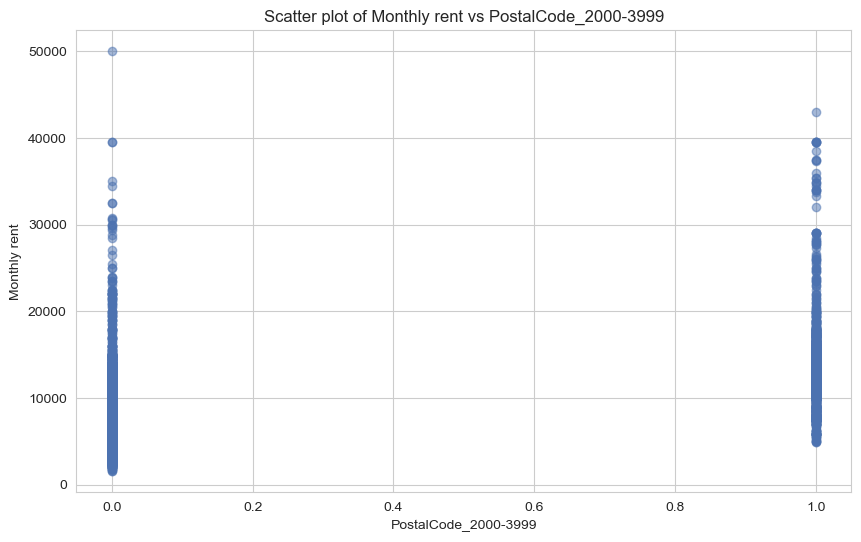

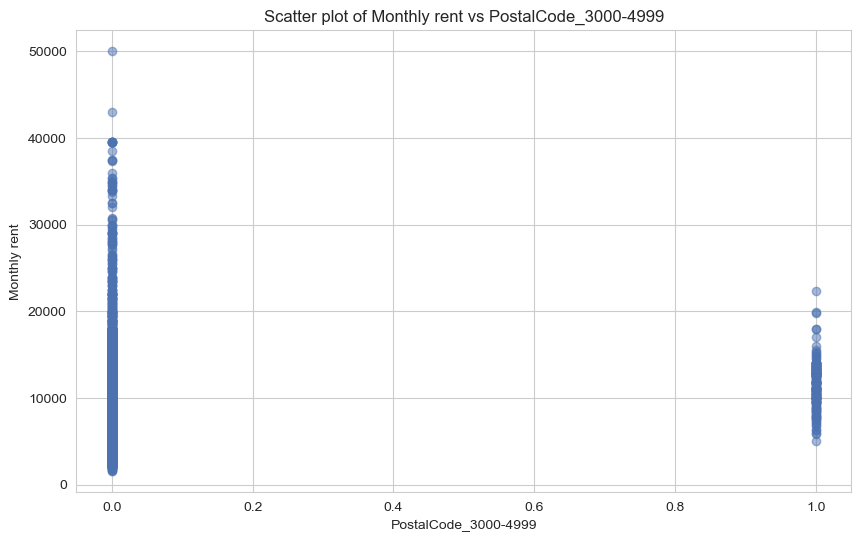

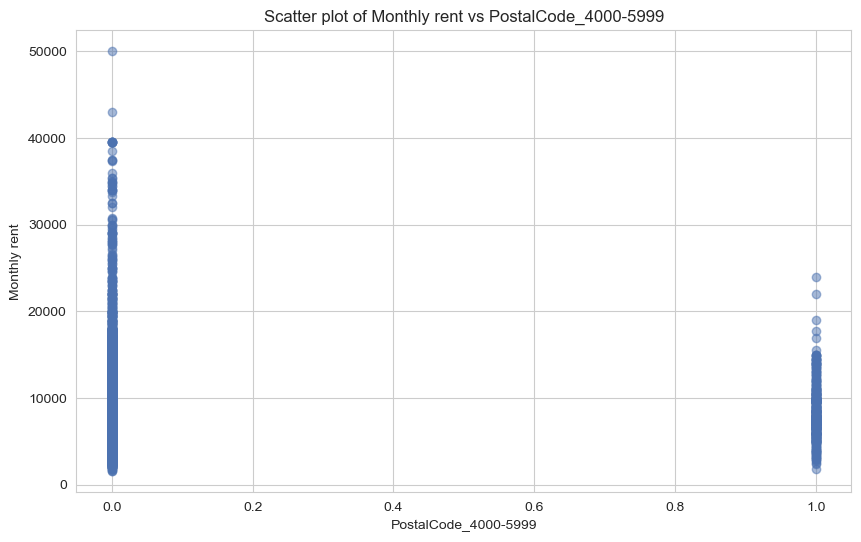

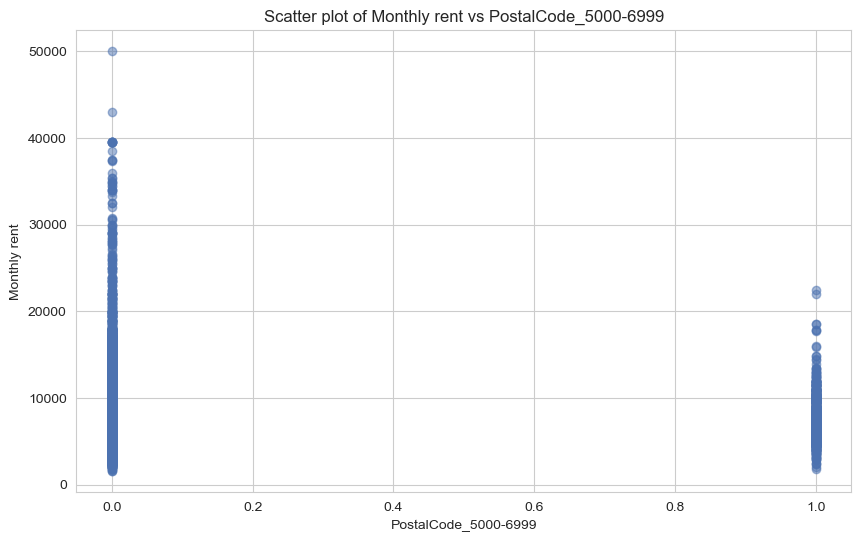

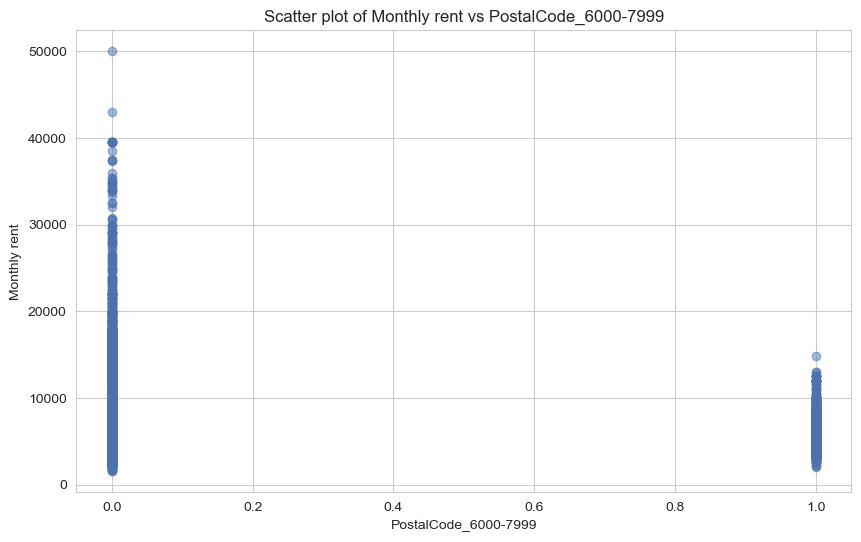

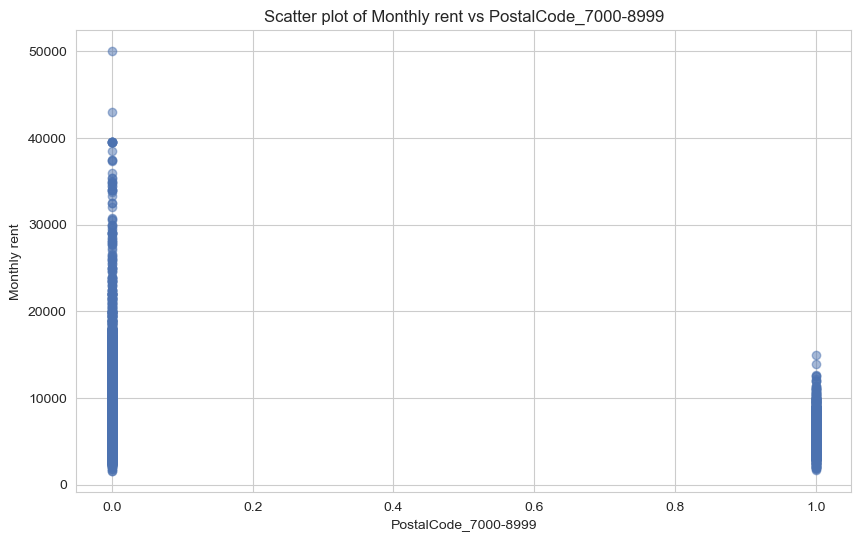

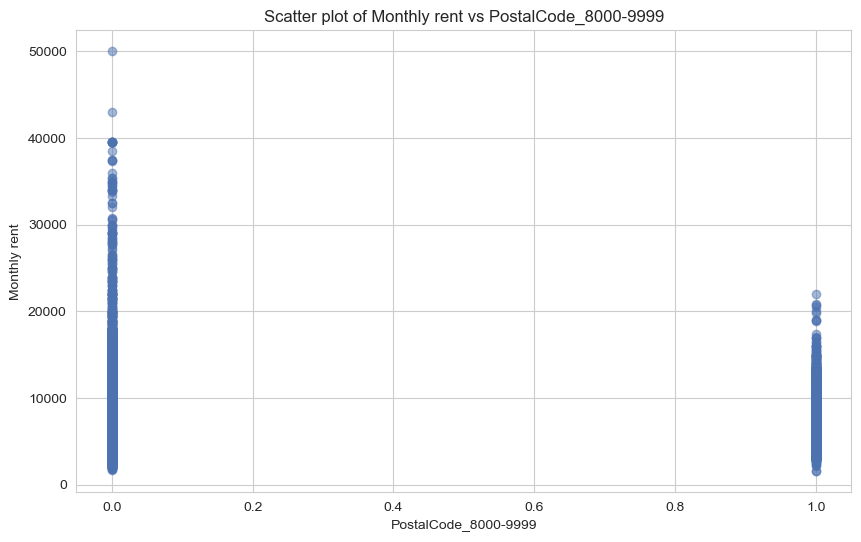

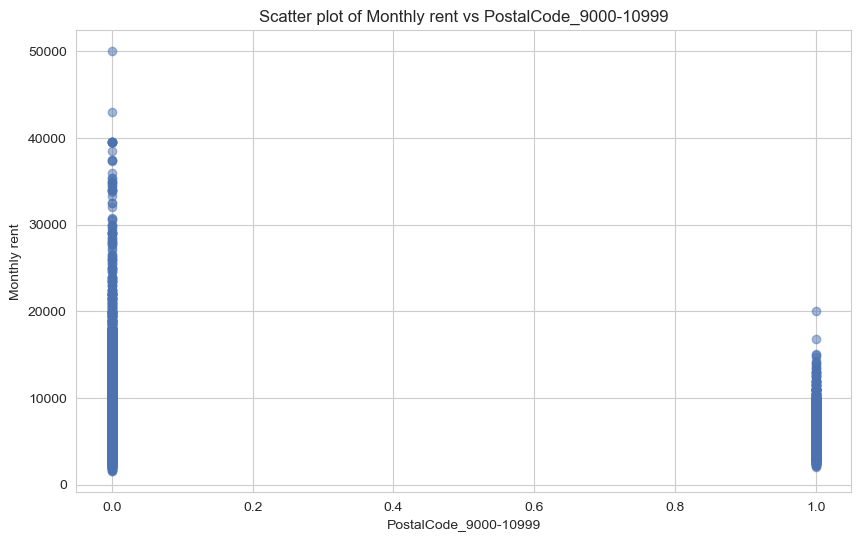

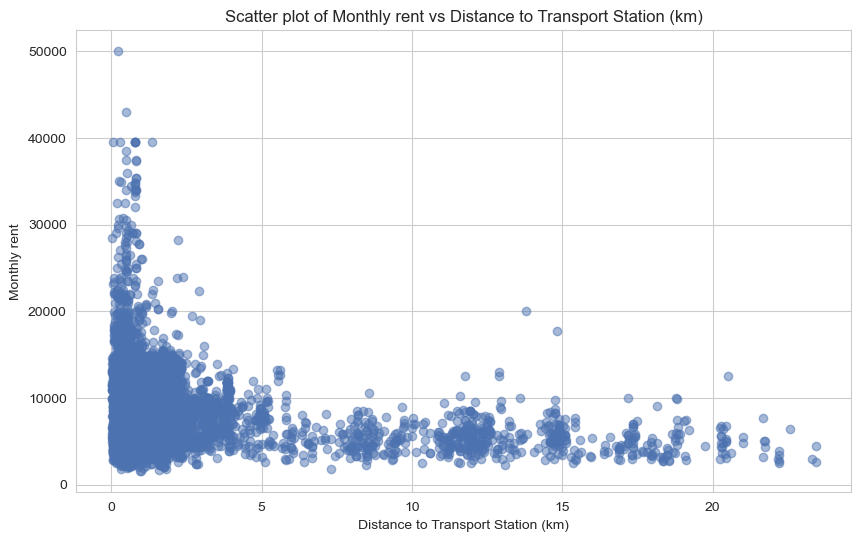

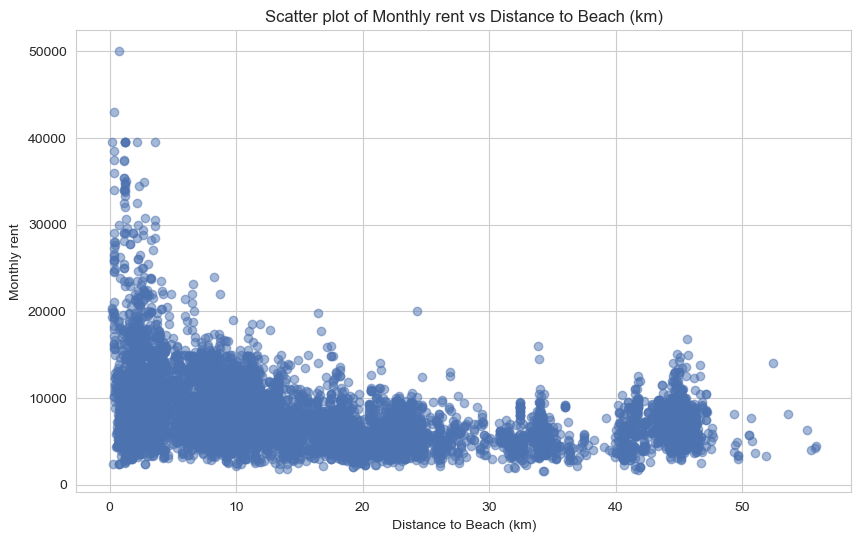

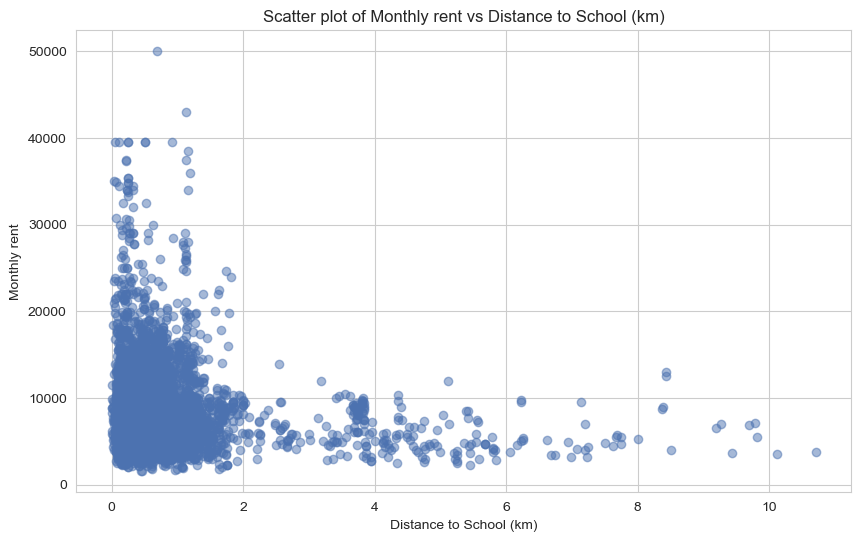

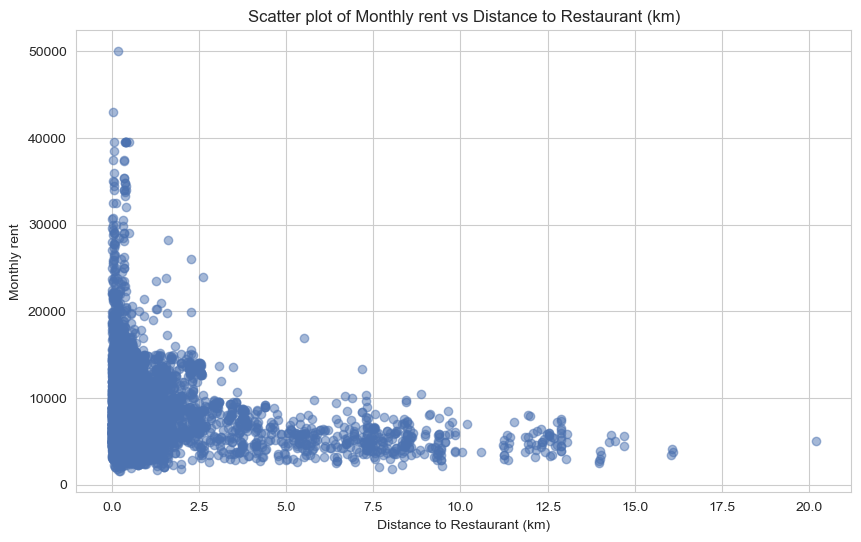

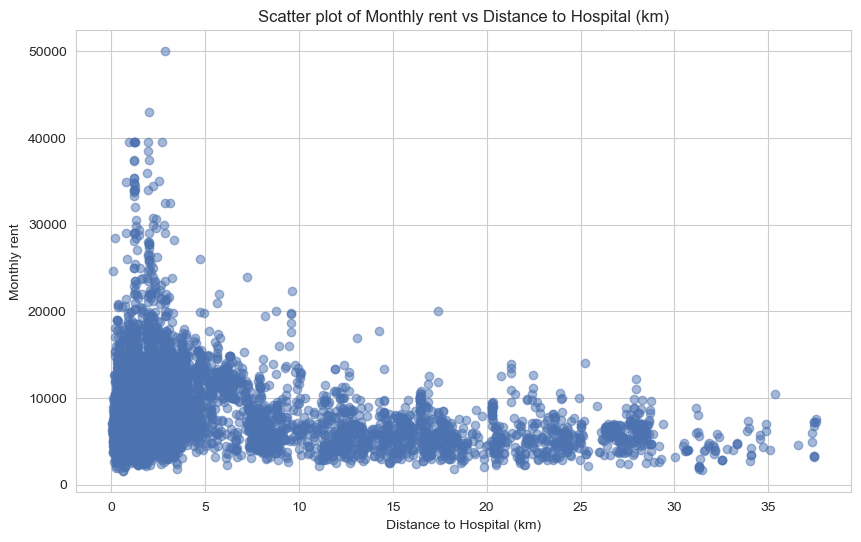

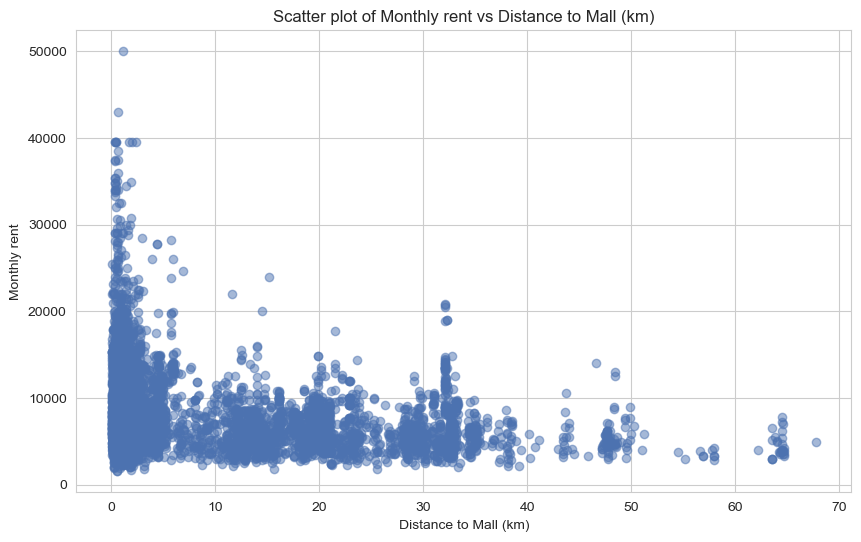

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
Data_wo_outliers = pd.read_csv('Data_wo_outliers.csv')

# Define the target and features
target = "Monthly rent"
features = Data_wo_outliers.columns.drop(target)

# Plotting scatter plots
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(Data_wo_outliers[feature], Data_wo_outliers[target], alpha=0.5)
    plt.title(f'Scatter plot of {target} vs {feature}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.grid(True)
    
    # Format y-axis to display numbers in standard decimal notation
    plt.ticklabel_format(style='plain', axis='y')
    
    plt.show()


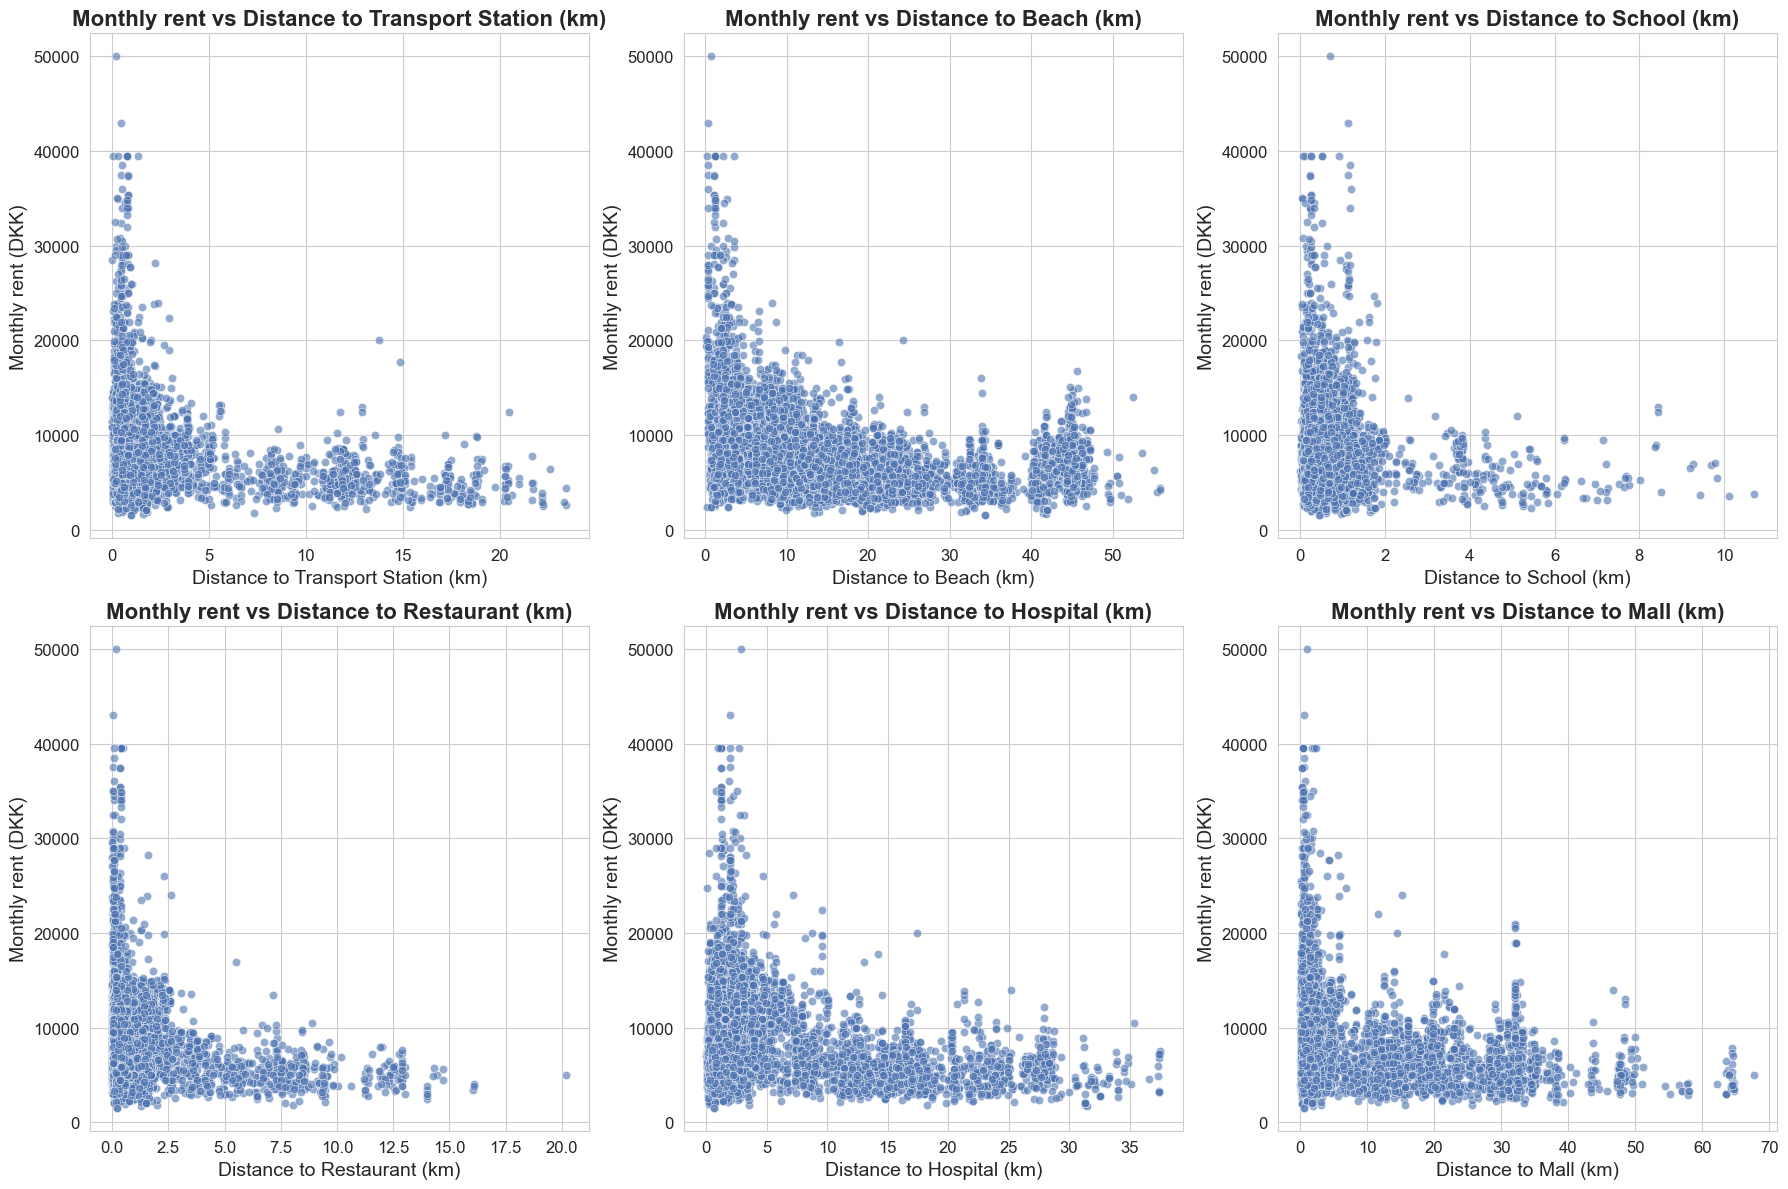

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a sophisticated style
sns.set_style("whitegrid")
sns.set_palette("deep")

# Load the dataset
Modified_data = pd.read_csv('Data_wo_outliers.csv')

# Define the target
target = "Monthly rent"

# Filter columns that start with "Distance to..."
distance_features = [col for col in Modified_data.columns if col.startswith("Distance to")]

# Create scatter plots grouped in 2 rows with 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, feature in enumerate(distance_features):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(Modified_data[feature], Modified_data[target], alpha=0.6, edgecolor='w', linewidth=0.5)
    axes[row, col].set_title(f'{target} vs {feature}', fontsize=16, fontweight='bold')
    axes[row, col].set_xlabel(feature, fontsize=14)
    axes[row, col].set_ylabel("Monthly rent (DKK)", fontsize=14)  # Set y-axis title
    axes[row, col].tick_params(axis='both', which='major', labelsize=12)
    axes[row, col].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.savefig("scatter_plots.png", dpi=300, bbox_inches='tight')
plt.show()
